<a href="https://colab.research.google.com/github/strangelycutlemon/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# TODO - code!

# Bayes' Theorem
def bayes(P_B_given_A, P_A, P_B):
  return (P_B_given_A * P_A) / P_B

# Bayes' Theorem in a function that can be applied to itself for multiple tries
def iterable_bayes(P_B_given_A, P_A, P_B):
  return (bayes(P_B_given_A, P_A, P_B), P_A, P_B)

# Run Bayes' Theorem iteratively a number of times
def bayes_repeat(P_B_given_A, P_A, P_B, tries=5):
  prior = P_A
  for i in range(tries):
    prior = iterable_bayes(P_B_given_A, prior, P_B)[1]
  return (P_B_given_A, prior, P_B)

# Function as specified in assignment
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_drunk_prior * prob_positive_drunk) / prob_positive


In [0]:
# set up experiments to test with Bayes' Theorem

# Breathalizer P(B) = 0.081 due to a small chance of a true positive.

#              P(A|B)  P(A)   P(B)
breathalyzer = [1.000, 0.001, 0.081]
drugs =        [0.990, 0.005, (0.99*0.005 + 0.01*0.995)]

print(bayes(*breathalyzer))
print(bayes(*drugs))
print(bayes_repeat(*breathalyzer)[1])
print(bayes_repeat(*drugs)[1])

0.0125
0.33221476510067116
0.001
0.005


# **Bring in the old code.**

In [0]:
'''
This cell is copied from an exercise earlier this week.
It imports congressional voting records and computes confidence intervals of mean 
votes within parties.
'''
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
namelist = ['Class Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
df = pd.read_csv(url, names=namelist, na_values=np.NaN)
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.rename(columns={'Class Name':'Party'},inplace=True)
rep = df[df.Party == 'republican']
dem = df[df.Party == 'democrat']

from scipy import stats

dem_set = dem['adoption-of-the-budget-resolution']
rep_set = rep['adoption-of-the-budget-resolution']

def confidence_interval(data, confidence_level=.95, trim_unit=False):
  data = np.array(data)[~np.isnan(data)]
  n = len(data)
  sample_mean = np.mean(data)
  sample_std = np.std(data, ddof=n-1)
  std_error = sample_std / n**0.5
  margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2.0, n - 1)
  lower_bound = sample_mean - margin_of_error
  upper_bound = sample_mean + margin_of_error
  # Optional: trims confidence interval to valid 0-1 range.
  # 0 and 1 not used because they don't plot properly.
  if trim_unit == True:
    if lower_bound <= 0:
      lower_bound = 0.0001
    if upper_bound >= 1:
      upper_bound = 0.9999
  # print(margin_of_error, std_error, n, sample_mean, stats.t.ppf((confidence_level / 2.0), n - 1))
  return (sample_mean, lower_bound, upper_bound)

import seaborn as sns
import matplotlib.pyplot as plt

# set numpy to ignore errors
np.seterr(divide='ignore', invalid='ignore')

def question_plot(question, confidence_level=.95, trim_unit=False):
  dem_set = dem[str(question)]
  rep_set = rep[str(question)]
  dem_ci = confidence_interval(dem_set, confidence_level=0.95, trim_unit=True)
  rep_ci = confidence_interval(rep_set, confidence_level=0.95, trim_unit=True)
  
  fig, ax = plt.subplots()
  plt.title(question)
  plt.hist([rep_set, dem_set], color=['r', 'b'], alpha=0.5)
  plt.axvline(x=rep_ci[1], color='red', alpha=0.6)
  plt.axvline(x=rep_ci[2], color='red', alpha=0.6)
  plt.axvline(x=rep_ci[0], color='crimson')

  plt.axvline(x=dem_ci[1], color='m', alpha=0.6)
  plt.axvline(x=dem_ci[2], color='m', alpha=0.6)
  plt.axvline(x=dem_ci[0], color='navy');

  return abs(dem_ci[0] - rep_ci[0])
  

# Compare bayesian CI to my previous CI function.

In [9]:
print(stats.bayes_mvs(dem_set[~np.isnan(dem_set)], alpha=0.95)[0])
print(confidence_interval(dem_set))

Mean(statistic=0.8884615384615384, minmax=(0.8499435153340716, 0.9269795615890052))
(0.8884615384615384, 0.268572621507179, 1.508350455415898)


# Same Mean. Very different confidence interval.

# The next thing to do is plot all the questions using Bayesian confidence intervals and see if they differ much from my previous method.

In [0]:
'''
In this cell I modify the above functions to use Bayesian confidence intervals.
'''

def bayes_confidence_interval(data, confidence_level=.95, trim_unit=False):
  data = np.array(data)[~np.isnan(data)]
  result = stats.bayes_mvs(data, confidence_level)[0]
  interval = result[1]
  return (result[0], interval[0], interval[1])

def bayes_question_plot(question, confidence_level=.95, trim_unit=False):
  dem_set = dem[str(question)]
  rep_set = rep[str(question)]
  dem_ci = bayes_confidence_interval(dem_set, 0.95, trim_unit=True)
  rep_ci = bayes_confidence_interval(rep_set, 0.95, trim_unit=True)
  
  fig, ax = plt.subplots()
  plt.title(f"Bayes | {question}")
  plt.hist([rep_set, dem_set], color=['r', 'b'], alpha=0.5)
  plt.axvline(x=rep_ci[1], color='red', alpha=0.6)
  plt.axvline(x=rep_ci[2], color='red', alpha=0.6)
  plt.axvline(x=rep_ci[0], color='crimson')

  plt.axvline(x=dem_ci[1], color='m', alpha=0.6)
  plt.axvline(x=dem_ci[2], color='m', alpha=0.6)
  plt.axvline(x=dem_ci[0], color='navy');

  return abs(dem_ci[0] - rep_ci[0])

In [31]:
bayes_confidence_interval(rep_set, 0.95, trim_unit=True)[0]

0.13414634146341464

In [32]:
bayes_confidence_interval(dem_set)

(0.8884615384615384, 0.8499435153340716, 0.9269795615890052)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


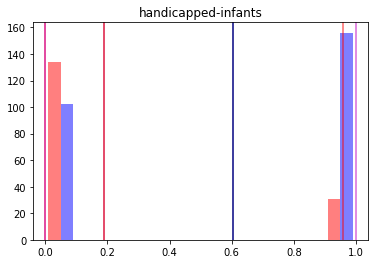

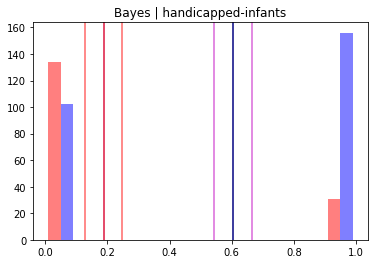

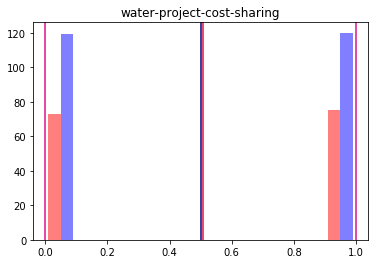

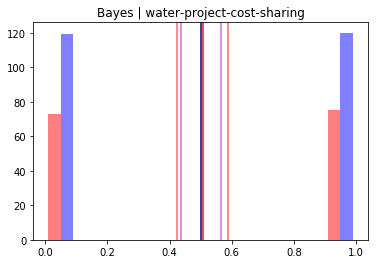

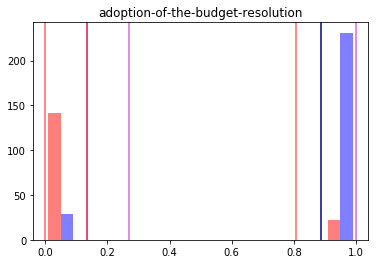

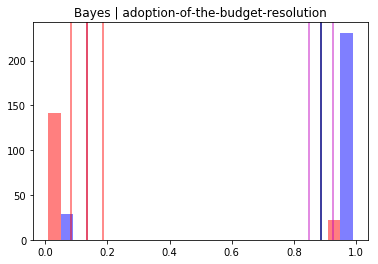

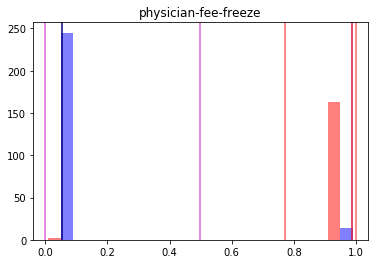

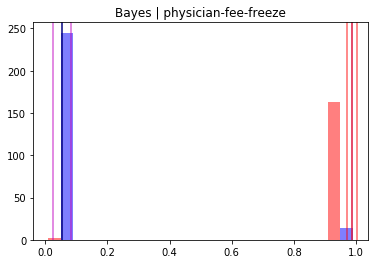

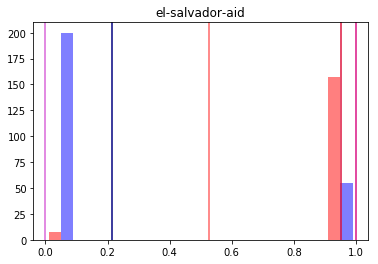

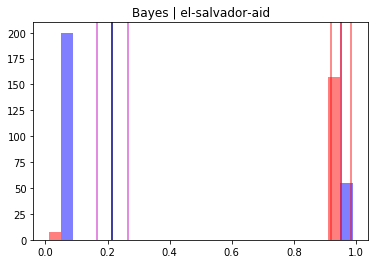

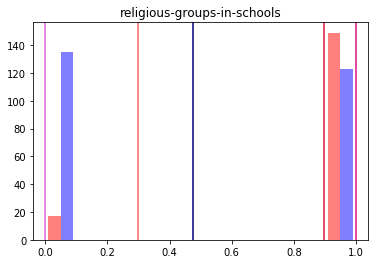

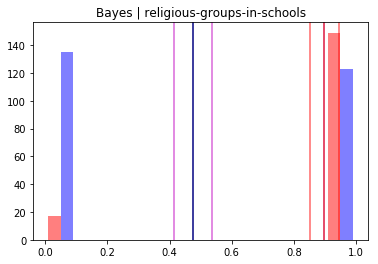

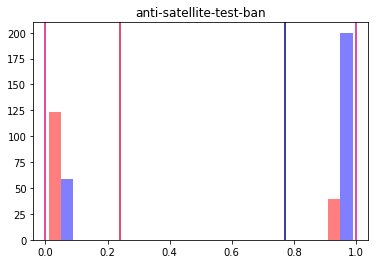

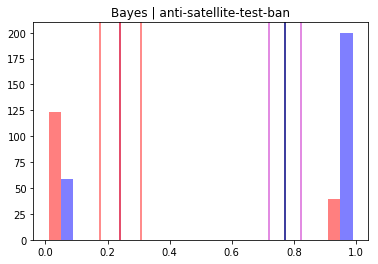

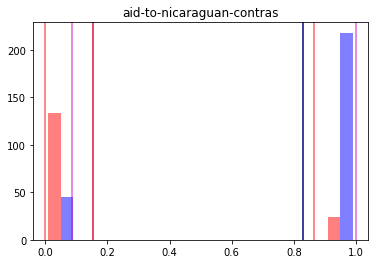

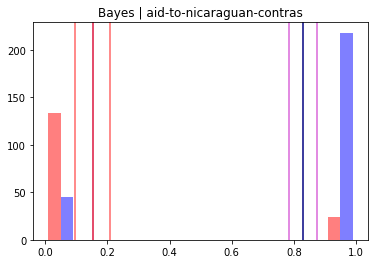

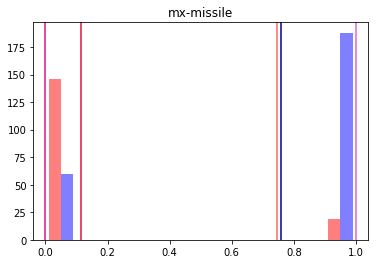

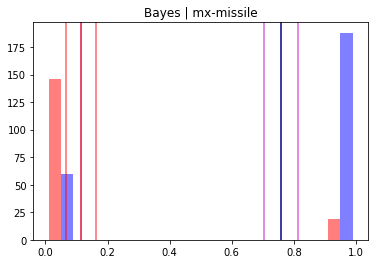

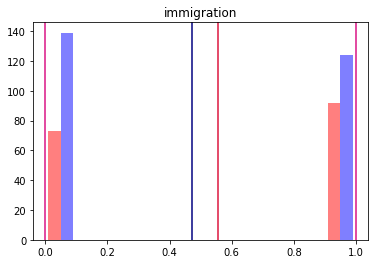

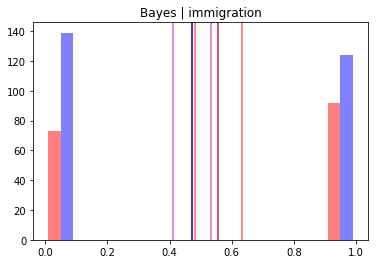

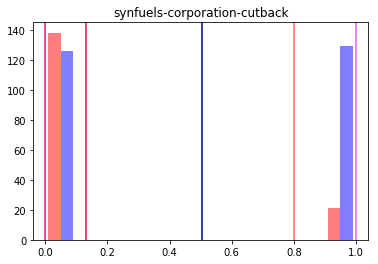

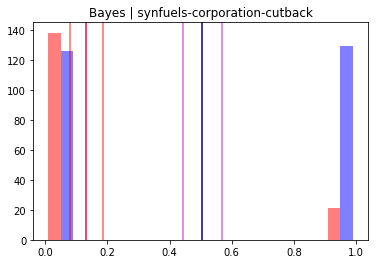

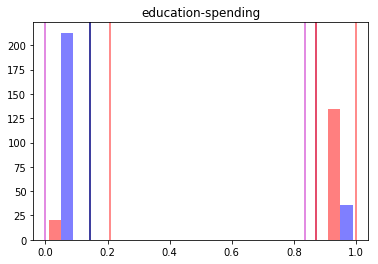

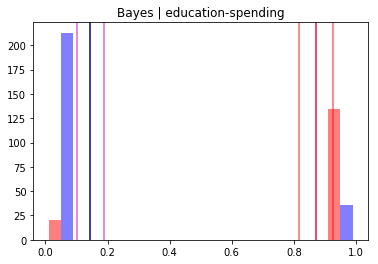

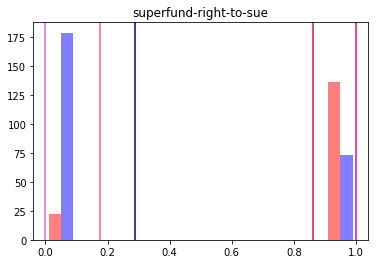

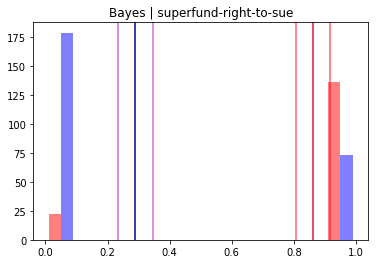

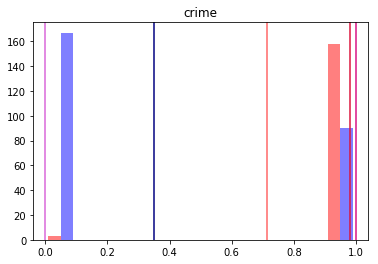

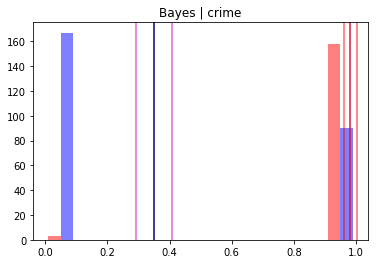

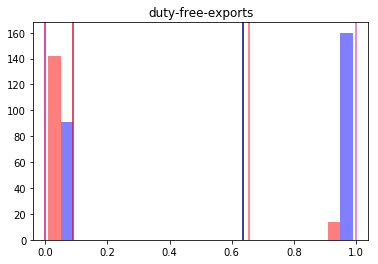

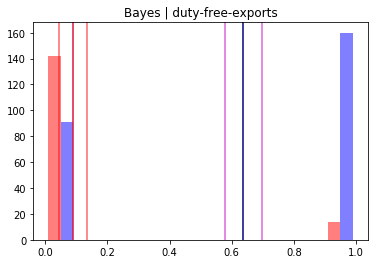

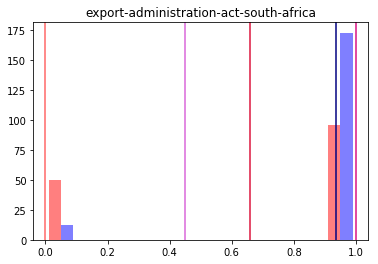

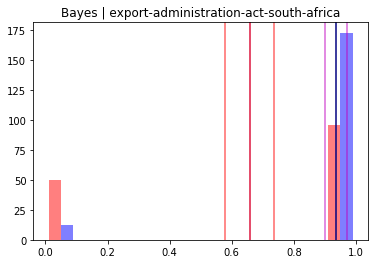

In [33]:
top = ''
largest_divide = 0
for q in df.columns[1:]:
  question_plot(q)
  bayes_question_plot(q)

## **Bayesian confidence intervals are way tighter (thus more useful) than the ones calculated using the student's t-statistic.**

Two possible explanations for this:

1. Bayes is better than the Student's T-Test for this data.

2. I implemented the Student's T-Test wrong in the first case.

## My best attempt at a summary of Bayesian vs Frequentist methods:

Bayes: Updating beliefs based on priors and empirical evidence

Frequentist: Updating empirical measurements using beliefs

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)